<a href="https://colab.research.google.com/github/rg-smith/remote_sensing_course/blob/main/SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [19]:
def multilook(raster,looks):
    for kk in range(raster.shape[2]):
        raster[:,:,kk]=ndimage.generic_filter(np.squeeze(raster[:,:,kk]), np.nanmean, size=looks, mode='constant', cval=np.NaN)
        raster[:,:,kk]=raster[:,:,kk]/np.nanmax(raster[:,:,kk])
    #raster=raster[0::looks,0::looks,:]
    return(raster)

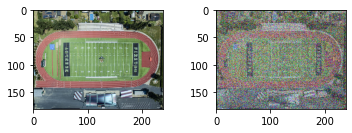

In [20]:
field=img.imread('football_field.jpg')
field=field[1::4,1::4,:]
noise=np.random.uniform(low=0,high=300,size=field.shape)
field_noisy=field+noise
field_noisy=field_noisy/np.max(field_noisy)
plt.figure();
plt.subplot(2,2,1)
plt.imshow(field);
plt.subplot(2,2,2);
plt.imshow(field_noisy)

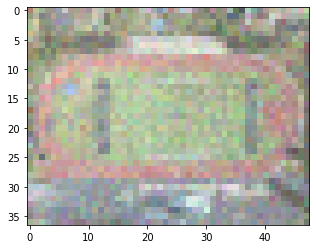

In [18]:
field_multilook=multilook(field_noisy,5)
plt.figure()
plt.imshow(field_multilook)
